In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))


In [10]:
t,x,y=np.loadtxt('data/Messung.dat',skiprows=1,usecols=(1,2,3),converters={1:comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack=True)
#t=t[4:]
#x=x[4:]
#y=y[4:]

In [11]:
dt=np.array([])
dx=np.array([])
dy=np.array([])
i=0
while i < len(t)-1:
    dt=np.append(dt,t[i+1]-t[i])
    dx=np.append(dx,x[i+1]-x[i])
    dy=np.append(dy,y[i+1]-y[i])
    i = i+1
r_squared=dx**2+dy**2

In [12]:
r_squared_mean=np.mean(r_squared)
print("r_squared_mean= ",r_squared_mean)
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared))
print("r_squared_mean_std= ",r_squared_mean_std)
dt_mean=np.mean(dt)
print("dt_mean= ",dt_mean)

r_squared_mean=  1.80415556051
r_squared_mean_std=  0.152267667041
dt_mean=  1.03238853503


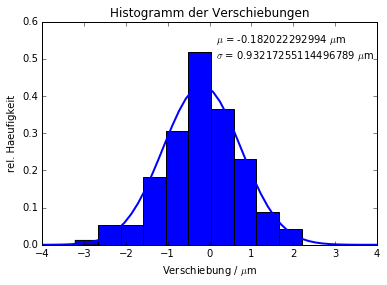

In [39]:
all_data=np.append(dx, dy)
plt.hist(all_data, normed=1)
plt.title('Histogramm der Verschiebungen')
plt.xlabel('Verschiebung /'+' $\mu$'+'m')
plt.ylabel('rel. Haeufigkeit')
mu=np.mean(all_data)
sigma=np.std(all_data)
plt.text(0.15, 0.5, '$\mu$'+' = '+'%s'%(mu)+' $\mu$'+'m'+'\n'+'$\sigma$'+' = '+'%r'%(sigma)+' $\mu$'+'m')
gauss=mlab.normpdf(np.linspace(-4,4),mu,sigma)
plt.plot(np.linspace(-4,4), gauss,'b-', linewidth = 2)
#plt.savefig('figures/bron2.pdf',fomat='pdf')

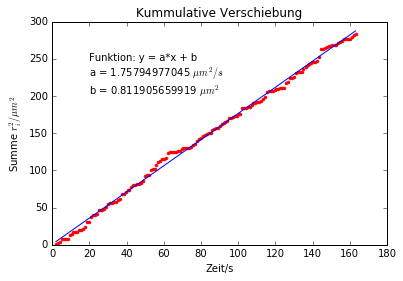

In [60]:
r_kumm=np.cumsum(r_squared)
plt.plot(t[:-1], r_kumm, marker='.',color='red',linewidth=0)
from scipy.optimize import curve_fit
def linear(x, a, b):
    return a*x+b
popt, pcov = curve_fit(linear, t[:-1], r_kumm)
plt.xlabel('Zeit/s')
plt.ylabel('Summe $r_i^2 /\mu m^2$')
plt.title('Kummulative Verschiebung')
plt.text(20, 200, 'Funktion: y = a*x + b'+'\n'+'a = '+'%s'%popt[0]+' $\mu m^2 /s$'+'\n'+'b = '+'%s'%popt[1]+' $\mu m^2$')
plt.plot(t[:-1], linear(t[:-1], *popt))
plt.savefig('figures/bronw3.pdf',format='pdf')